In [1]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn

### Pytorch Practice1

- MSE(Mean Squared Error)를 구하시오

$$ \frac{1}{N} \sum_{i}^{N} (y_{i} - \hat{y}_{i})^{2} $$


In [6]:
y_hat = torch.tensor([1., 2., 3., 2., 1.])
y =  torch.tensor([1.2, 2.1, 3.4, 2.3, 1.2])
mse = 0
# TODO
# Hint. torch.pow(a, x) = a^x
mse = torch.mean(torch.pow(y-y_hat, 2))

assert abs(mse.item() - 0.0680) < 1e-4

### Pytorch Practice2

- CNN 레이어를 2번 통과하면서 Input과 Output의 dimension이 같은 Network를 만드세요
- Hint 
$$ W' = \frac{W-F+2P}{S} + 1$$

In [9]:
import torch
import torch.nn as nn

class MyCNN1(nn.Module):
    def __init__(self):
        super(MyCNN1, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, 
                               out_channels=3,
                               kernel_size=3,
                               stride=1,
                               padding=1)
        
        self.conv2 = nn.Conv2d(in_channels=3, 
                               out_channels=3,
                               kernel_size=5,
                               stride=1,
                               padding=2)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.conv1(x)
        x = nn.ReLU()(x) 
        x = self.conv2(x)
        return x

x = torch.randn(16, 3, 128, 128)

model = MyCNN1()
y = model(x)

assert x.shape == y.shape

### Pytorch Practice3

- CNN 레이어를 2번 통과하고, 통과 할 때 마다 width와 hight가 절반으로 줄어드는 Network를 만드세요

- Hint 
$$ W' = \frac{W-F+2P}{S} + 1$$

In [13]:
import torch
import torch.nn as nn

class MyCNN2(nn.Module):
    def __init__(self):
        super(MyCNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, 
                               out_channels=3,
                               kernel_size=3,
                               stride=2,
                               padding=1)
        
        self.conv2 = nn.Conv2d(in_channels=3, 
                               out_channels=3,
                               kernel_size=5,
                               stride=2,
                               padding=2)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.conv1(x)
        x = nn.ReLU()(x) 
        x = self.conv2(x)
        return x

x = torch.randn(16, 3, 128, 128)
model = MyCNN2()
y = model(x)
a = torch.randn(16, 3, (128 // 4), (128 // 4))

assert y.shape == a.shape

### Pytorch Practice4

- 다음 코드들을 적절한 위치에 끼워 넣으세요
    - optimizer = optim.SGD(model.parameters(), lr=0.001)
    - loss.backward()
    - optimizer.step()
    - optimizer.zero_grad()

- 출력되는 loss graph가 단조 감소하면 성공

- Hint - training sequence
- Inference -> Loss -> Gradient -> Update

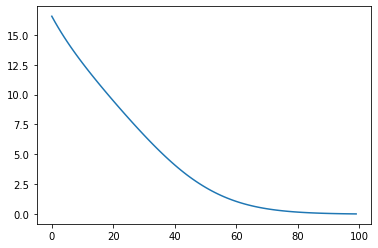

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
torch.random.manual_seed(1)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)      
        self.fc2 = nn.Linear(10, 2)                        
    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return x

x = torch.tensor([0.1, 0.1])
gt = torch.tensor([3., 4.])
model = Net()

optimizer = optim.SGD(model.parameters(), lr=0.001)

losses = []

for i in range(100):
    y = model(gt)
    loss = ((gt - y) ** 2).mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.plot(losses)
plt.show()
    

### Optional 
### Pytorch Practice5

- Practice4를 GPU에서 동작하도록 고치시오

In [ ]:
# TODO
